
<div style="text-align:center; font-size:32px;">
XGB_boost Model without prod of 2022
</div>

---

### Import necessary librairies

In [37]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from xgboost import XGBRegressor

## Data prep
---

In [38]:
# uploading the excel
df_excel_complete = pd.read_excel('Proj_B1_consolidado_indicadores_Eloi_version.xlsx')

# Converting it in CSV File
df_excel_complete.to_csv('Proj_B1_consolidado_indicadores.csv', index=False)

# check conversion by showing the 5 first lines of the dataset. Cool to see the different columns
df_excel_complete.head()


,DATE,Bananas,Bananas s/prod22,Proj_Bananas,Proj_Bananas 2,Proj_Bananas_Eloi,Bananas actuel,GDP,Inflation,Unemployment_Rate,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,201907.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,-0.7,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201908.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,-0.1,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201909.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4,-0.3,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201910.0,NaN,NaN,NaN,NaN,NaN,NaN,0.8,-0.1,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201911.0,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.2,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# show list of the columns names
df_excel_complete.columns

Index(['DATE', 'Bananas', 'Bananas s/prod22', 'Proj_Bananas', 'Proj_Bananas 2',
       'Proj_Bananas_Eloi', 'Bananas actuel', 'GDP', 'Inflation',
       'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m',
       'Euribor1year', 'Unnamed: 13', 'Unnamed: 14', 'Idmes', 'Quarter',
       'GDP.1', 'Inflation.1', 'Unemployment_Rate.1', 'LT_Interest_Rate.1',
       'ST_Interest_Rate', 'Euribor1year.1', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [49]:
# Sélections of the columns we need to make predictions
columns_needed = ['DATE',
                  'Bananas s/prod22',
                  'GDP',
                  'Inflation',
                  'Unemployment_Rate',
                  'LT_Interest_Rate',
                  'ST_Interest_RateE3m',
                  'Euribor1year']

df_reduced=df_excel_complete[columns_needed]
df_reduced.head()

,DATE,Bananas s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
0,2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
1,2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2,2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
3,2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
4,2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720


In [50]:
# Recharger la colonne DATE en string -> enlève le .0 a la fin du numéro de l'année 
# Removing the ".0" at the end of the date 
df_reduced['DATE'] = df_reduced['DATE'].astype(str).str.replace('.0', '', regex=False)
df_reduced.head()

/var/folders/yb/rh2b9l9n369fmm3cb0qrfhn40000gp/T/ipykernel_54343/24597367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['DATE'] = df_reduced['DATE'].astype(str).str.replace('.0', '', regex=False)


,DATE,Bananas s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
0,2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
1,2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2,2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
3,2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
4,2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720


In [ ]:
# seting the date in Index of the dataset
df_reduced = df_reduced.set_index('DATE')
df_reduced.head()


,Bananas s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720


In [66]:
#put the index to datetime
df_reduced.index = pd.to_datetime(df_reduced.index)
df_reduced

,Bananas s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.40,-0.7,6.6,0.440,-0.3649,-0.2833
2019-08-01,NaN,0.40,-0.1,6.5,0.170,-0.4077,-0.3563
2019-09-01,NaN,0.40,-0.3,6.6,0.200,-0.4176,-0.3391
2019-10-01,NaN,0.80,-0.1,6.6,0.190,-0.4129,-0.3042
2019-11-01,NaN,0.80,0.2,6.8,0.350,-0.4013,-0.2720
...,...,...,...,...,...,...,...
2026-08-01,NaN,1.95,1.8,6.4,1.586,2.3400,1.6240
2026-09-01,NaN,1.95,2.1,6.4,1.542,2.5000,1.5270
2026-10-01,NaN,1.97,2.5,6.4,1.507,2.1300,1.4350


In [67]:
# on supprime la dernière ligne qui est incomplète
#df_reduced=df_reduced.iloc[:-1,:]
#print(df_reduced.dtypes)

In [70]:
# separation of the dataset of data that are real and data that aren't real
df_known = df_reduced.loc[:'2025-07']

# pb of type of columns that are 'object' and not'float' so we are converting them 
cols_to_convert = ['Inflation', 'ST_Interest_RateE3m']

for col in cols_to_convert:
    df_known[col] = pd.to_numeric(df_known[col], errors='coerce')

# check the type of the columns after the modification
print(df_known.dtypes)

# Train/Test separation : 80 % train 20 % test
train_size = int(len(df_known) * 0.8)
train, test = df_known[:train_size], df_known[train_size:]
train = train.dropna()
# Data to predict (after july 2025 here)                                        need to be changed !!
df_forecast = df_reduced.loc['2025-08':]

# Verification
print(train.shape, test.shape)
print(df_forecast.shape)

Bananas s/prod22       float64
GDP                    float64
Inflation              float64
Unemployment_Rate      float64
LT_Interest_Rate       float64
ST_Interest_RateE3m    float64
Euribor1year           float64
dtype: object
(46, 7) (15, 7)
(17, 7)


/var/folders/yb/rh2b9l9n369fmm3cb0qrfhn40000gp/T/ipykernel_54343/2769953435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known[col] = pd.to_numeric(df_known[col], errors='coerce')



---


### Feature prep

In [71]:
#define X et Y for training of the model
features = ['GDP', 'Inflation', 'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year']
X_train = train[features]
y_train = train['Bananas s/prod22']
X_test = test[features]
y_test = test['Bananas s/prod22']


In [73]:
#show X_train
X_train

,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,
2020-07-01,14.4,-0.1,8.2,0.40,-0.4441,-0.2789
2020-08-01,14.4,-0.2,8.3,0.36,-0.4797,-0.3589
2020-09-01,14.4,-0.8,8.1,0.32,-0.4914,-0.4146
2020-10-01,0.2,-0.6,7.6,0.18,-0.5091,-0.4660
2020-11-01,0.2,-0.4,7.2,0.07,-0.5209,-0.4806
2020-12-01,0.2,-0.3,6.9,0.03,-0.5381,-0.4966
2021-01-01,-2.8,0.2,7.0,0.03,-0.5472,-0.5047
2021-02-01,-2.8,0.3,7.0,0.16,-0.5411,-0.5009
2021-03-01,-2.8,0.1,6.8,0.23,-0.5391,-0.4867


In [74]:
#Show Y_train
y_train

DATE
2020-07-01    0.043437
2020-08-01    0.040134
2020-09-01    0.040497
2020-10-01    0.041286
2020-11-01    0.042188
2020-12-01    0.042471
2021-01-01    0.041921
2021-02-01    0.039109
2021-03-01    0.036047
2021-04-01    0.027355
2021-05-01    0.023560
2021-06-01    0.023568
2021-07-01    0.025691
2021-08-01    0.025819
2021-09-01    0.026737
2021-10-01    0.027689
2021-11-01    0.028446
2021-12-01    0.029269
2022-01-01    0.027318
2022-02-01    0.027579
2022-03-01    0.028315
2022-04-01    0.032446
2022-05-01    0.033680
2022-06-01    0.035237
2022-07-01    0.036317
2022-08-01    0.041387
2022-09-01    0.042503
2022-10-01    0.045632
2022-11-01    0.051418
2022-12-01    0.056538
2023-01-01    0.045249
2023-02-01    0.046629
2023-03-01    0.048806
2023-04-01    0.049186
2023-05-01    0.048998
2023-06-01    0.050089
2023-07-01    0.051729
2023-08-01    0.050981
2023-09-01    0.045925
2023-10-01    0.050326
2023-11-01    0.052246
2023-12-01    0.044757
2024-01-01    0.042280
2024-0

---

## Final version of XGB_boost with K-fold, lags and itératives predictions

---

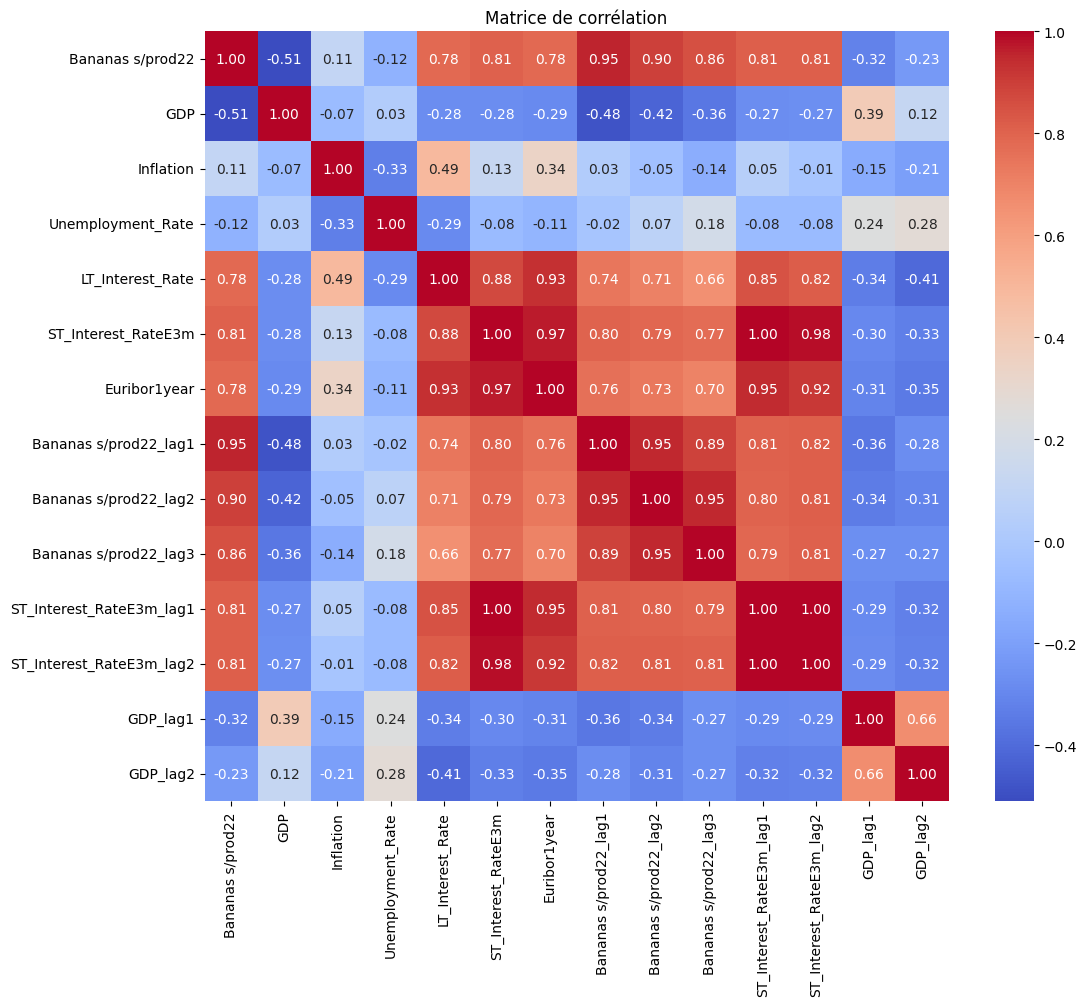

Fold 1 RMSE: 0.00301
Fold 2 RMSE: 0.00219
Fold 3 RMSE: 0.00385
Fold 4 RMSE: 0.00329
Fold 5 RMSE: 0.00407


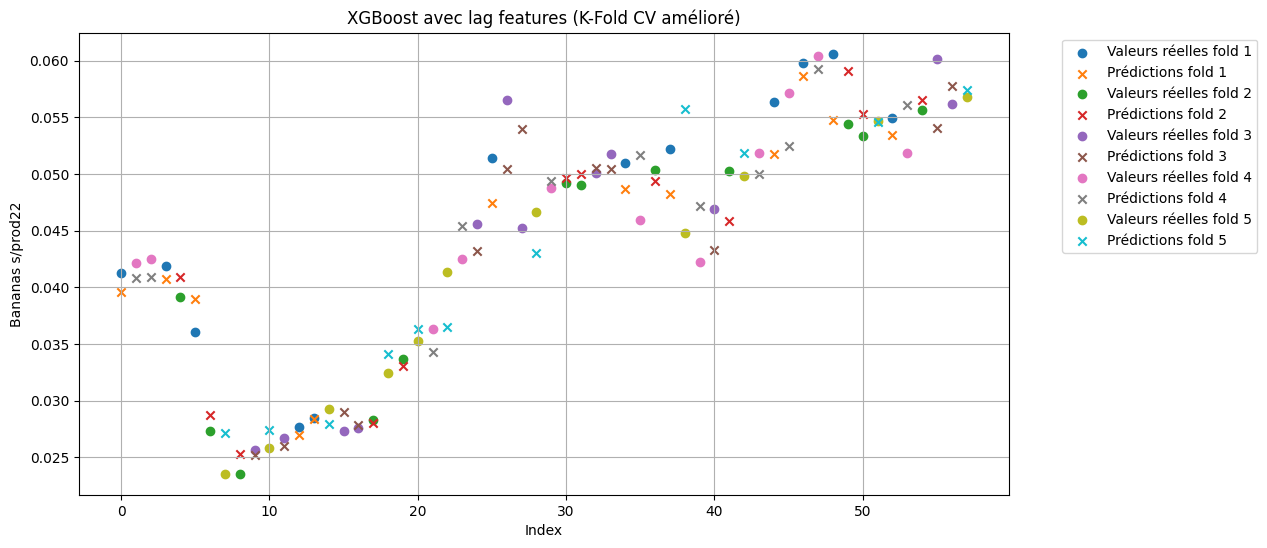

RMSE moyen sur tous les folds: 0.00328


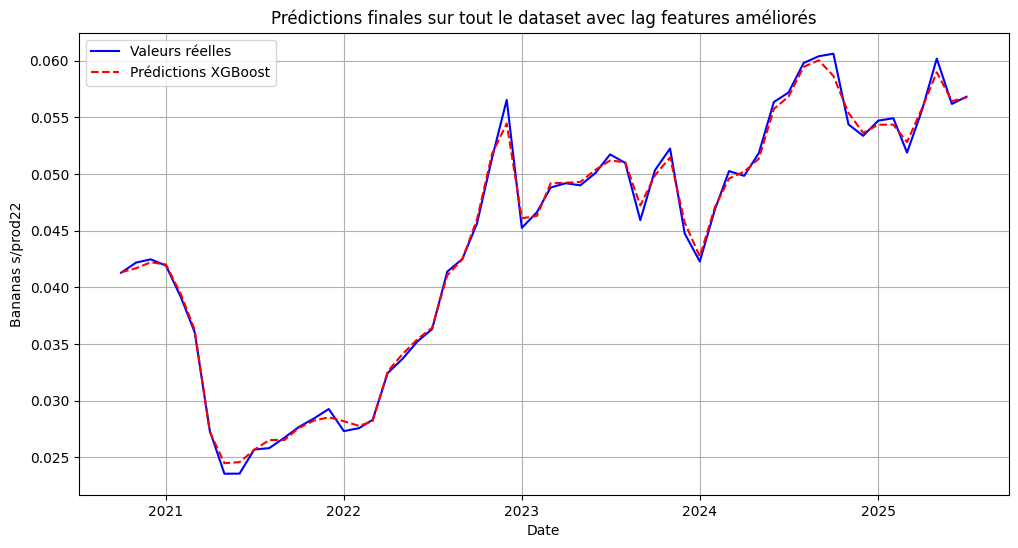

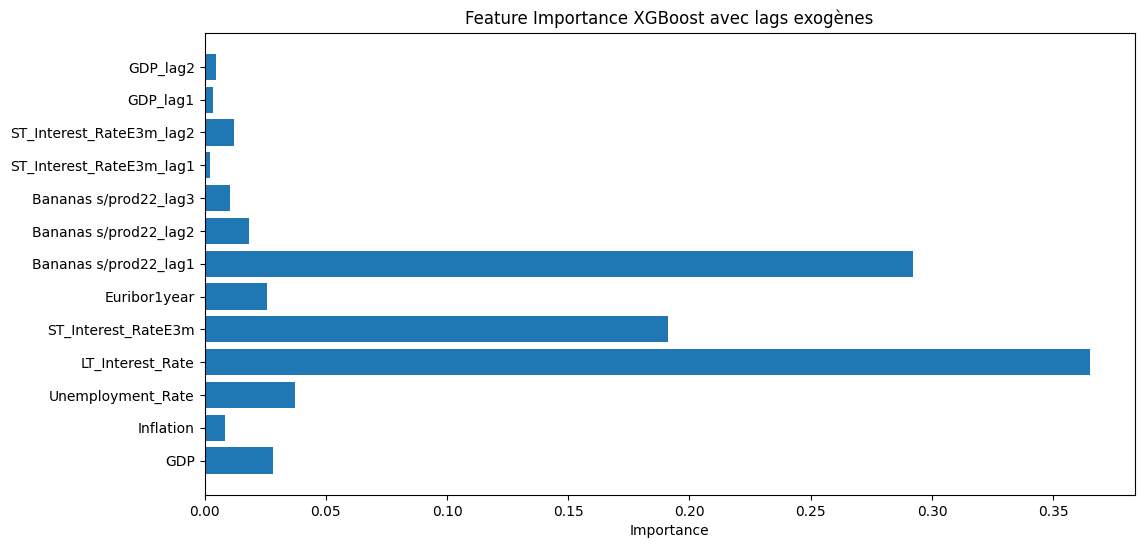

In [ ]:
#best modele xgboost avec lag et k fold 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns

# --- 1. function to create lag ---
def create_lag_features(df, target_col, lags_target=[1,2,3], lags_exog={}):
    """
    df : dataframe
    target_col : columne target (Bananas s/prod22)
    lags_target : lags sur la target
    lags_exog : dict {feature_name: [list_of_lags]}
    """
    df_lag = df.copy()
    
    # Lags on the target
    for lag in lags_target:
        df_lag[f'{target_col}_lag{lag}'] = df_lag[target_col].shift(lag)
    
    # Lags on features exogènes
    for feature, lags in lags_exog.items():
        for lag in lags:
            df_lag[f'{feature}_lag{lag}'] = df_lag[feature].shift(lag)
    
    df_lag = df_lag.dropna()
    return df_lag

# Lags
lags_target = [1,2,3]
lags_exog = {
    'ST_Interest_RateE3m': [1,2],
    'GDP': [1,2]
}
 
df_lag = create_lag_features(df_known, 'Bananas s/prod22', lags_target=lags_target, lags_exog=lags_exog)

# --- 2. correlation matrix ---
plt.figure(figsize=(12,10))
sns.heatmap(df_lag.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# --- 3. define features and target ---
features = ['GDP', 'Inflation', 'Unemployment_Rate', 
            'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year'] + \
           [f'Bananas s/prod22_lag{lag}' for lag in lags_target] + \
           [f'{feat}_lag{lag}' for feat, lags in lags_exog.items() for lag in lags]

X_all = df_lag[features]
y_all = df_lag['Bananas s/prod22']

# --- 4. K-Fold Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_folds = []

plt.figure(figsize=(12,6))
for i, (train_index, val_index) in enumerate(kf.split(X_all)):
    X_tr, X_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y_tr, y_val = y_all.iloc[train_index], y_all.iloc[val_index]
    
    model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_tr, y_tr)
    
    y_pred_fold = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_fold))
    rmse_folds.append(rmse)
    
    # Plot of prédictions vs real
    plt.scatter(val_index, y_val, label=f'Valeurs réelles fold {i+1}', marker='o')
    plt.scatter(val_index, y_pred_fold, label=f'Prédictions fold {i+1}', marker='x')
    
    print(f"Fold {i+1} RMSE: {rmse:.5f}")

plt.xlabel('Index')
plt.ylabel('Bananas s/prod22')
plt.title('XGBoost avec lag features (K-Fold CV amélioré)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

print(f"RMSE moyen sur tous les folds: {np.mean(rmse_folds):.5f}")

# --- 5. final training on all dataset ---
model_final = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model_final.fit(X_all, y_all)

y_pred_all = model_final.predict(X_all)

plt.figure(figsize=(12,6))
plt.plot(df_lag.index, y_all.values, label='Valeurs réelles', color='blue')
plt.plot(df_lag.index, y_pred_all, label='Prédictions XGBoost', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bananas s/prod22')
plt.title('final predictions on all the dataset with lag features améliorés')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Feature importance ---
importances = model_final.feature_importances_
plt.figure(figsize=(12,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance XGBoost avec lags exogènes")
plt.show()


### Code to apply the model for our forecast of 2026

In [ ]:
#meilleurs resultats en xgboost et réalisation 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. join historic data and future one
df_full = pd.concat([df_known, df_forecast])
df_full = df_full.sort_index()

# 2. lag creation
def create_lag_features(df, target_col, lags_target=[1,2,3], lags_exog=[1]):
    df_lagged = df.copy()
    # Lags of target
    for lag in lags_target:
        df_lagged[f"{target_col}_lag{lag}"] = df_lagged[target_col].shift(lag)
    # Lags for variables exogènes
    for col in df.columns:
        if col != target_col:
            for lag in lags_exog:
                df_lagged[f"{col}_lag{lag}"] = df_lagged[col].shift(lag)
    return df_lagged

lags_target = [1,2,3]
lags_exog = [1]

df_full_lag = create_lag_features(df_full, "Bananas s/prod22", lags_target, lags_exog)

# 3. Séparer historique et futur
df_train_lag = df_full_lag.loc[df_full_lag.index].dropna()

X_train = df_train_lag.drop(columns=["Bananas s/prod22"])
y_train = df_train_lag["Bananas s/prod22"]

# train of the model
model = RandomForestRegressor(random_state=0, n_estimators=500)
model.fit(X_train, y_train)

# error sur l’historique
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE (train):", rmse_train)

# 4. Prédictions itératives sur le futur
df_future_preds = df_full_lag.loc[df_forecast.index].copy()
features = X_train.columns  # mêmes features qu’au training
y_pred_future = []

for date in df_future_preds.index:
    # Features du mois t
    X_t = df_future_preds.loc[date, features].values.reshape(1, -1)
    # Prédiction Bananas_t
    y_t = model.predict(X_t)[0]
    df_future_preds.loc[date, "Bananas_pred"] = y_t
    y_pred_future.append(y_t)
    
    # Mise à jour des lags pour le mois suivant
    next_idx = df_future_preds.index.get_loc(date) + 1
    if next_idx < len(df_future_preds):
        next_date = df_future_preds.index[next_idx]
        df_future_preds.loc[next_date, "Bananas s/prod22_lag1"] = y_t
        df_future_preds.loc[next_date, "Bananas s/prod22_lag2"] = df_future_preds.loc[date, "Bananas s/prod22_lag1"]
        df_future_preds.loc[next_date, "Bananas s/prod22_lag3"] = df_future_preds.loc[date, "Bananas s/prod22_lag2"]

# Résultat final
print("\nPrévisions Bananas s/prod22 2025-08 → 2026-12 :")
print(df_future_preds[["Bananas_pred"]])
df_future_preds

RMSE (train): 0.0011364986775627968


/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegress


Prévisions Bananas s/prod22 2025-08 → 2026-12 :
            Bananas_pred
DATE                    
2025-08-01      0.057892
2025-09-01      0.056553
2025-10-01      0.056483
2025-11-01      0.056410
2025-12-01      0.056429
2026-01-01      0.055801
2026-02-01      0.054134
2026-03-01      0.053583
2026-04-01      0.053468
2026-05-01      0.053396
2026-06-01      0.053112
2026-07-01      0.053108
2026-08-01      0.052756
2026-09-01      0.051596
2026-10-01      0.051079
2026-11-01      0.049019
2026-12-01      0.048641


/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/eloikling1/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegress

,Bananas s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year,Bananas s/prod22_lag1,Bananas s/prod22_lag2,Bananas s/prod22_lag3,GDP_lag1,Inflation_lag1,Unemployment_Rate_lag1,LT_Interest_Rate_lag1,ST_Interest_RateE3m_lag1,Euribor1year_lag1,Bananas_pred
DATE,,,,,,,,,,,,,,,,,
2025-08-01,NaN,1.85,2.319907,6.256436,2.847713,2.673615,1.908,0.056817,0.056180,0.060178,0.60,2.500000,5.900000,3.110000,1.990000,2.080,0.057892
2025-09-01,NaN,1.85,2.319907,6.256436,2.847713,2.673615,1.867,0.057892,0.056817,0.056180,1.85,2.319907,6.256436,2.847713,2.673615,1.908,0.056553
2025-10-01,NaN,1.78,2.218197,6.209587,2.797713,2.423615,1.844,0.056553,0.057892,0.056817,1.85,2.319907,6.256436,2.847713,2.673615,1.867,0.056483
2025-11-01,NaN,1.78,2.218197,6.209587,2.797713,2.423615,1.875,0.056483,0.056553,0.057892,1.78,2.218197,6.209587,2.797713,2.423615,1.844,0.056410
2025-12-01,NaN,1.78,2.218197,6.209587,2.797713,2.423615,1.763,0.056410,0.056483,0.056553,1.78,2.218197,6.209587,2.797713,2.423615,1.875,0.056429
2026-01-01,NaN,1.79,2.200000,6.400000,1.708000,2.320000,2.097,0.056429,0.056410,0.056483,1.78,2.218197,6.209587,2.797713,2.423615,1.763,0.055801
2026-02-01,NaN,1.79,1.900000,6.400000,1.637000,2.100000,1.971,0.055801,0.056429,0.056410,1.79,2.200000,6.400000,1.708000,2.320000,2.097,0.054134
2026-03-01,NaN,1.79,1.800000,6.400000,1.624000,2.200000,1.899,0.054134,0.055801,0.056429,1.79,1.900000,6.400000,1.637000,2.100000,1.971,0.053583
2026-04-01,NaN,1.87,2.100000,6.400000,1.639000,2.020000,1.805,0.053583,0.054134,0.055801,1.79,1.800000,6.400000,1.624000,2.200000,1.899,0.053468


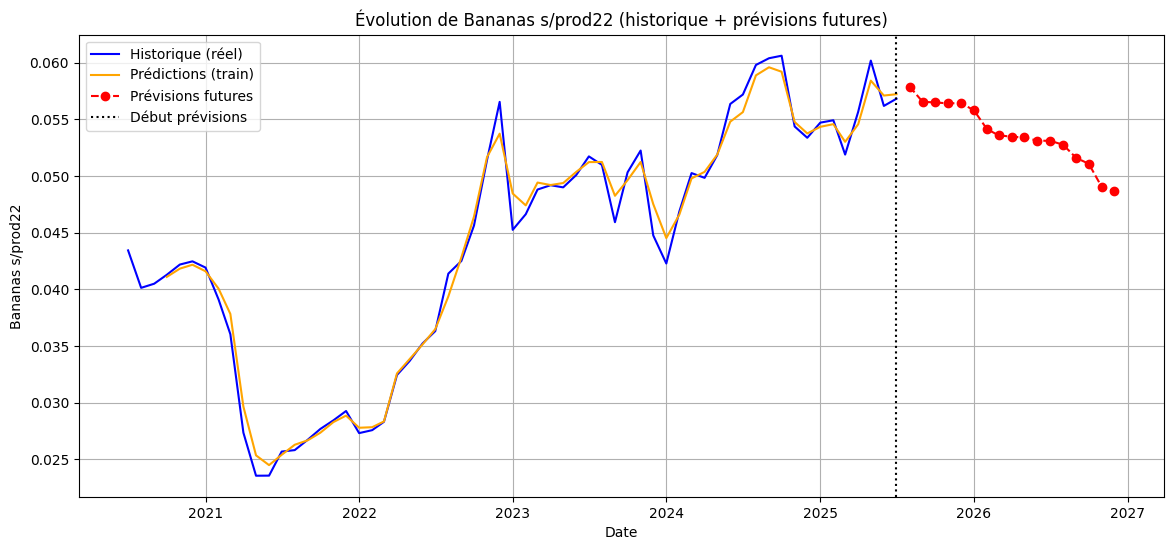

In [65]:
#plot des resultats pr 2026
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Historique réel
plt.plot(df_known.index, df_known["Bananas s/prod22"], label="Historique (réel)", color="blue")

# Prédictions sur la période d'entraînement
#plt.plot(df_known.index, y_train_pred, label="Prédictions (train)", color="orange")
plt.plot(y_train.index, y_train_pred, label="Prédictions (train)", color="orange")

# Prévisions futures
plt.plot(df_future_preds.index, df_future_preds["Bananas_pred"], 
         label="Prévisions futures", color="red", linestyle="--", marker="o")

# Ligne verticale au moment de la coupure
plt.axvline(x=df_known.index[-1], color="black", linestyle=":", label="Début prévisions")

plt.title("Évolution de Bananas s/prod22 (historique + prévisions futures)")
plt.xlabel("Date")
plt.ylabel("Bananas s/prod22")
plt.legend()
plt.grid(True)
plt.show()


---

---

## Annexe